<a href="https://colab.research.google.com/github/Jnyambok/11-Plots-of-Data-Science/blob/main/11_Plots_of_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. KS plot

Before anything, the difference between PDF and CDF is that PDF **represent the likelihood of a continuous random variable taking on a specifc value** whereas **represents the probability that a random variable takes on a value less than on equal to a specific value**

Imagine you have a jar of marbles of different colors.

PDF: Tells you how many marbles of each color are in the jar (relative frequency).
CDF: Tells you the probability of
pulling out a marble that is either red, or blue, or green, etc., up to a certain color in the order you've arranged them.

Let's say you have a random variable representing the height of people in a population.

  PDF: Might show that the most common height is around 5'9" (high point on the graph).
  CDF: Would show the probability that a randomly selected person is 5'9" or shorter.

The **Kolmogorov-Smirnov (KS)** Plot is a nonparametric (not of normal distribution) test used extensively in statistical analysis to compare two distributions. It serves as a visual and analytical tool to determine if two samples come from the same distribution. This is particularly important in fields like finance, where analysts compare the distribution of returns from different investment strategies to assess their similarity or disparity. The KS statistic, which is central to this analysis, quantifies the maximum distance between the Cumulative Distribution Functions (CDFs) of the two distributions under comparison

At its core, the KS Plot visualizes the CDFs of two distributions, allowing analysts to visually assess the difference between them. The Kolmogorov-Smirnov statistic, which quantifies this difference, is the maximum vertical distance between the two CDFs. This statistic is crucial because it provides a measure of the dissimilarity between two empirical distributions. A small KS statistic suggests that the distributions are similar, while a large KS statistic indicates a significant difference.

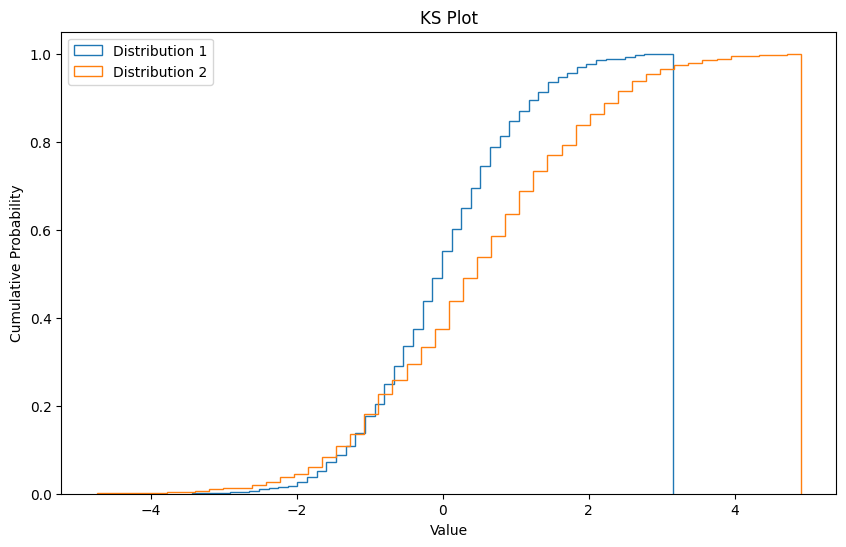

KS Statistic: 0.216, P-value: 5.356249099254043e-22


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#Generate two sample distributions
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(0.5, 1.5, 1000)

#Calculate KS statistics
d_value , p_value = stats.ks_2samp(data1, data2)

#Plot the cdfs
plt.figure(figsize=(10,6))
plt.hist(data1, bins=50, density=True, histtype='step', cumulative=True, label='Distribution 1')
plt.hist(data2, bins=50, density=True, histtype='step', cumulative=True, label='Distribution 2')
plt.title('KS Plot')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

print(f"KS Statistic: {ks_stat}, P-value: {p_value}")

### 2. SHAP Values

 **SHAP (SHapley Additive exPlanations)** plots are a powerful visualization tool used to understand the impact of individual features on a machine learning model's predictions.
SHAP values are model-agnostic, meaning they can be used to interpret any machine learning model

**Key Concepts:**

**Shapley Values:**These values quantify the contribution of each feature to the model's output for a specific prediction. They're derived from game theory, where each feature is considered a "player" contributing to the overall "payoff" (the model's prediction).   

**Force Plots:** These plots visually represent the Shapley values for a single prediction. They show how each feature's value shifts the model's output from the base value (the average prediction across all data points) to the final prediction.



How SHAP Plots Work:

1.   Calculate Shapley Values: The SHAP library calculates the Shapley values for each feature in your dataset.
2.   Create Force Plots: For each prediction, a force plot is generated.
The left side represents the base value (average prediction).
Features are displayed as bars, with their length and color indicating their impact on the prediction.
Red bars indicate features that push the prediction higher.   
Blue bars indicate features that push the prediction lower.  
The right side shows the final prediction.

Benefits of SHAP Plots:

**Explainability:** They provide a clear and intuitive way to understand the factors driving a model's predictions.   
**Feature Importance**: They help identify the most influential features for a given prediction.  
Model Debugging: They can help identify biases or unexpected behavior in the model.  
**Communication:** They effectively communicate model predictions to stakeholders who may not have a technical background.

**Additivity:** SHAP values are additive, which means that the contribution of each feature to the final prediction can be computed independently and then summed up. This property allows for efficient computation of SHAP values, even for high-dimensional datasets.

In [ ]:
!pip install shap
!pip install datasets

  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import shap
import numpy as np
from datasets import load_dataset
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Display the first few rows
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = iris_df.drop('target',axis=1)
y = iris_df.target

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Make prediction on the testing data
y_pred = clf.predict(X_test)

#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

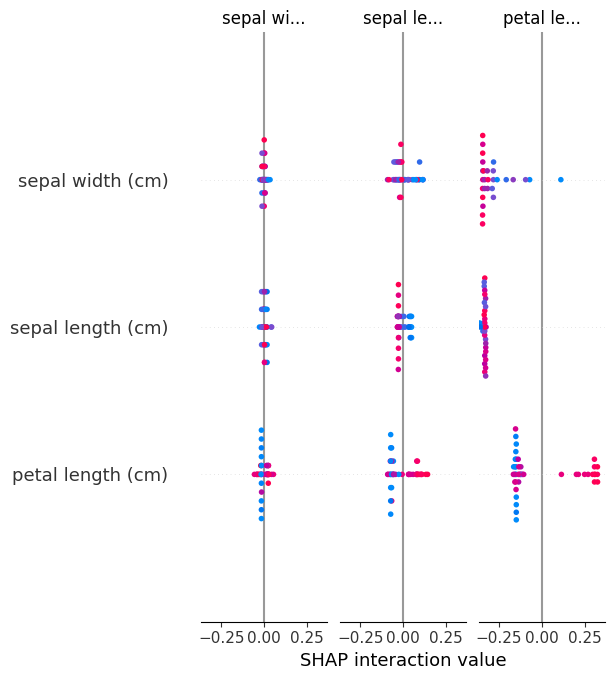

In [ ]:
shap.summary_plot(shap_values, X_test)

**Sepal Width vs. Sepal Length:**  There seems to be a slight positive interaction between these features. This suggests that when sepal width is high, an increase in sepal length tends to further increase the predicted value (likely the probability of belonging to a certain class).

**Sepal Length vs. Petal Length:**  There appears to be a strong positive interaction here. This implies that when sepal length is high, an increase in petal length has a significant positive impact on the predicted value.

**Petal Length vs. Sepal Width:** A noticeable negative interaction is observed. This suggests that when petal length is high, an increase in sepal width tends to decrease the predicted value.

You can read more on https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability

## 3. ROC-AUC plot


The **receiver operating characteristics curve** is visual representation of model performance across all thresholds. Binary classifiers output the probability of a data point belonging to the positive class. It is we who apply a threshold for this number and assign a label. If the probability is above the threshold, we say the predicted class is positive (1) else negative (0). Adjusting the threshold depends often on the use case. For cases where the cost of not capturing a positive example is greater than misclassifying a negative example as positive, one might choose a lower threshold and vice-versa.
ROC curve helps us visualize this trade-off across thresholds. The area under this curve (ROC-AUC) is a summary of how well the model separates the positive and negative examples for different thresholds.


AUC is a useful measure for comparing the performance of two different models, as long as the dataset is roughly balanced.


A good AUC measure typically falls between 0.8 and 1.0.AUC of 0.5: This indicates a random classifier, meaning the model is no better than random guessing.
AUC of 1.0: This represents a perfect classifier, correctly classifying all instances.

It is used for the following purposes:


1.   **Model Comparison** - To compare and contrast. Which model is guessing predictions. The model with the ROC curve closer to the top-left corner is generally better. A higher AUC indicates a better-performing model.
2.   **Threshold Selection:** - The ROC curve helps identify the optimal threshold for classifying instances. By adjusting the threshold, you can balance sensitivity and specificity.
3.   **Imbalanced Datasets:** - The ROC curve is less sensitive to imbalanced datasets, making it suitable for scenarios where the positive and negative classes have significantly different frequencies


Do not use ROC -AUC curve when:

1.   **Imbalanced Datasets**: When the positive class is significantly less frequent than the negative class since the ROC-AUC tends to be optimistic.  ROC curves can be misleading in imbalanced datasets. A model that simply predicts the majority class can achieve a high AUC, even if it performs poorly on the minority class. Precision-Recall curves, on the other hand, focus on the positive class, making them more suitable for imbalanced scenarios.Because Precision is directly influenced by class imbalance so the Precision-recall curves are better to highlight the differences between models for highly imbalanced data sets. When you compare different models with imbalanced settings, the area under the Precision-Recall curve will be more sensitive than the area under the ROC curve. The AP summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold. See the formula here. Because Precision and Recall are always between 0 and 1, AP falls within 0 (very poor) and 1 (excellent fit) also.
2.   **False Positives are costly:** In applications like medical diagnosis or fraud detection, false positives can have serious consequences.Precision-Recall curves prioritize precision, which is the proportion of true positive predictions among all positive predictions. This metric is more relevant when minimizing false positives is crucial.
3.   **True Negatives are Less Important:** In some cases, the focus might be on identifying the positive class, and the negative class is less critical.Precision-Recall curves directly assess the model's ability to correctly identify positive instances, making them more suitable for these scenarios.



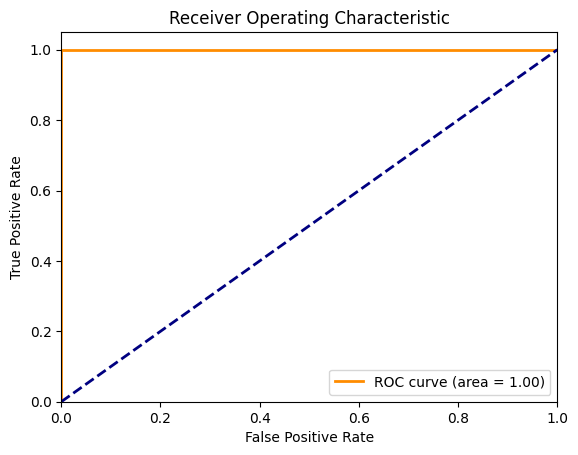

1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Sample data (replace with your actual predictions and true labels)
y_true = [0, 0, 1, 1, 1, 0, 1, 0]
y_scores = [0.2, 0.3, 0.7, 0.8, 0.9, 0.4, 0.6, 0.1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


print(roc_auc)

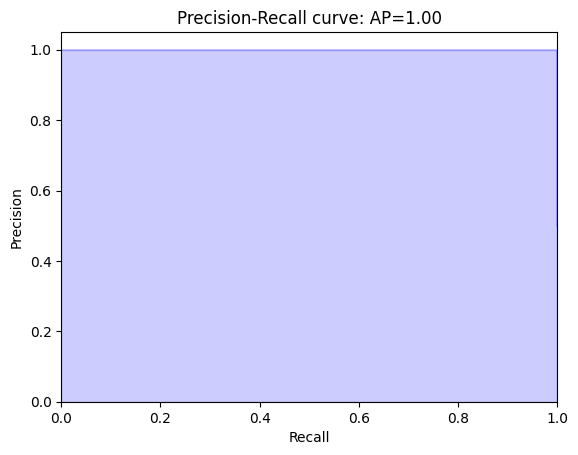

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Sample data (more realistic)
y_true = [1, 0, 1, 0, 1, 1, 0, 1, 0, 0]
y_scores = [0.9, 0.2, 0.8, 0.1, 0.7, 0.6, 0.3, 0.9, 0.4, 0.5]

# Calculate precision-recall curve and average precision
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
average_precision = average_precision_score(y_true, y_scores)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

##4. QQ Plot

The **quantile-quantile( QQ plot) plot** is a graphical method for determining if a dataset follows a certain probability distribution or whether two samples of data came from the same population or not.
QQ Plot is one of the graphical methods which can be used to check whether the data follows the Normal Distribution.

In a QQ Plot, we plot the theoretical quantiles of a distribution on the X-axis and the data quantiles on the Y-axis. If these points lie on a straight line (y=x), it indicates that our data follows that distribution.

If most of the points lie on a straight line (red line), we can suggest that our data follows a normal distribution. Here, we observe that the majority of our data falls on a straight line; however, additional statistical tests should be conducted to confirm its normality.

In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import statsmodels.api as sn
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("https://gist.githubusercontent.com/stoicsapien1/4c0d96aa3b6f99178f5ee071bef23d10/raw/281efb659ff1713ac64b680a9bf44a53ce367e38/data.csv")
df.head(4)

,data
0,104.97
1,109.64
2,100.55
3,98.05


In [ ]:
#lets standardize the data
df["Z"]=(df["data"]-df["data"].mean())/df["data"].std()
df[["Z"]].head(3)

,Z
0,0.557292
1,1.105236
2,0.038681


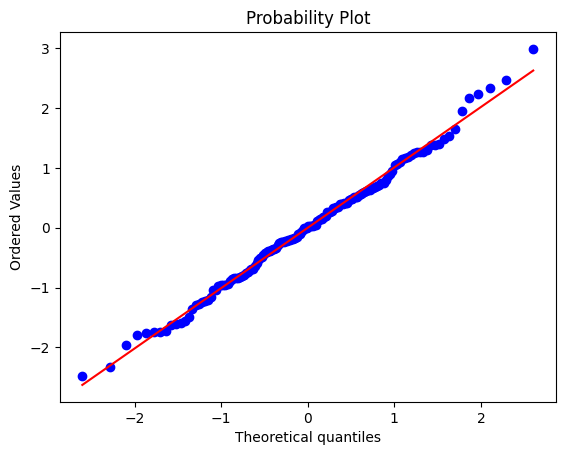

In [ ]:
stats.probplot(df["Z"],dist="norm",plot=plt)
plt.show()


It might be similar to KS plot but the difference is QQ plot focuses mostly on the visualization part as the KS focuses mostly on the 'Statistical part'
Their approach also is a bit different as KS quantifies the maximum difference between the empirical cumulative distribution function (ECDF) of your data and the theoretical cumulative distribution function (CDF) where A p-value is calculated. If the p-value is below a significance level (e.g., 0.05), we reject the null hypothesis that the data comes from the specified distribution where a **QQ plot visually compares the quantiles of your data to the quantiles of a theoretical distribution (e.g., normal, exponential).**

QQ Plot | KS Plot
-------------------|------------------
Focuses on the visual aspect       | More of a statistical test
Its main goal for an output is a plot     | Its main output is a statistical measure
Its interpretation is aimed to be subjective (Decide on your own)|Meant to be objective as it's governed by very specific rules
Sensitive to outliers|Sensitive to sample size

In [ ]:
import numpy as np

def cumulative_variance(data):
  """Calculates the cumulative variance of a time series.

  Args:
    data: A list or NumPy array of data points.

  Returns:
    A list of cumulative variances.
  """

  cum_var = []
  for i in range(len(data)):
    mean = np.mean(data[:i+1])
    var = np.var(data[:i+1])
    cum_var.append(var)
  return cum_var

# Example usage:
data = [1, 2, 3, 4, 5]
cumulative_variances = cumulative_variance(data)
print(cumulative_variances)

[0.0, 0.25, 0.6666666666666666, 1.25, 2.0]


##5. Cumulative Explained Variance

This plot is used to measure the effectiveness of PCA which seaks to reduced number of features in a dataset to retain only those with max variance.
The **Cumulative Explained Variance plot** is a graphical representation that shows the proportion of the dataset’s variance that is cumulatively explained by each component.

When you perform PCA, you’re transforming the data into a new coordinate system with axes ranked by how well they capture the variance in the data. Each axis (principal component) can explain a certain amount of the variance.

Visually, the Cumulative Explained Variance plot often shows a sharp turn or “elbow,” indicating the point at which adding more components has diminishing returns in terms of explained variance

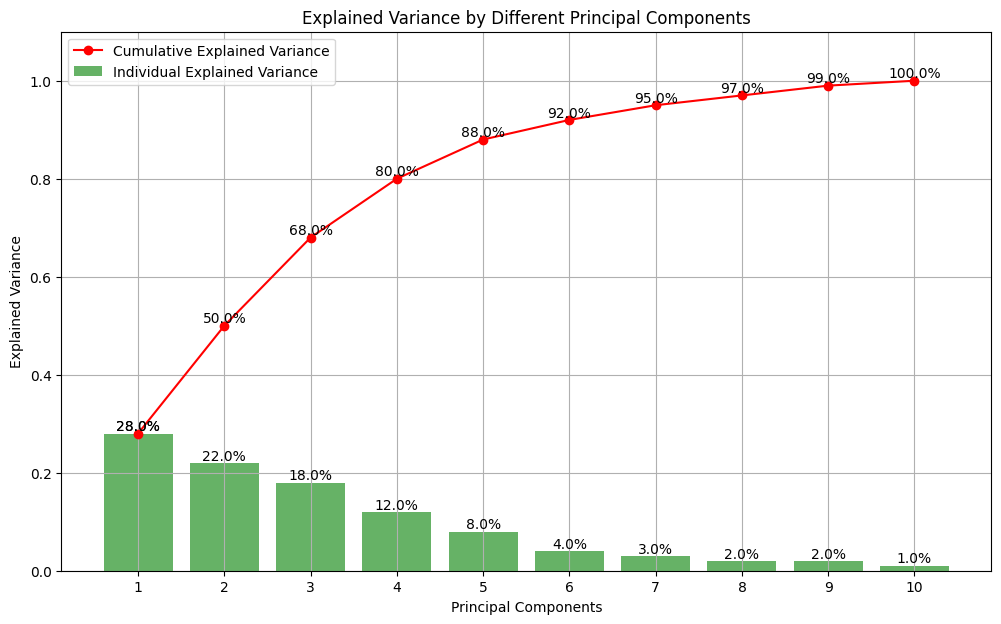

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Individual explained variances for 10 components
individual_variances = [0.28, 0.22, 0.18, 0.12, 0.08, 0.04, 0.03, 0.02, 0.02, 0.01]

# Compute the cumulative explained variance
cumulative_variances = np.cumsum(individual_variances)

# Create the bar plot for individual variances
plt.figure(figsize=(12, 7))
bar = plt.bar(range(1, 11), individual_variances, alpha=0.6, color='g', label='Individual Explained Variance')

# Create the line plot for cumulative variance
line = plt.plot(range(1, 11), cumulative_variances, marker='o', linestyle='-', color='r',
                label='Cumulative Explained Variance')

# Adding percentage values on top of bars and dots
for i, (bar, cum_val) in enumerate(zip(bar, cumulative_variances)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{individual_variances[i]*100:.1f}%',
             ha='center', va='bottom')
    plt.text(i+1, cum_val, f'{cum_val*100:.1f}%', ha='center', va='bottom')

# Aesthetics for the plot
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.xticks(range(1, 11))
plt.legend(loc='upper left')
plt.ylim(0, 1.1)  # extend y-axis limit to accommodate text labels
plt.grid(True)
plt.show()

The first six components explain 92% of the variance. This means you could reduce the dimensionality of your data to six dimensions from however many you started with, and still retain 92% of the variance. The remaining 8% might be noise, or it might contain information — it’s up to you to decide if it’s worth keeping.

Cumulative Explained Variance plots are powerful tools that provide insights into the effectiveness of PCA. They help us make informed decisions about the number of principal components to use by visualizing the trade-off between dimensionality and variance retained.

**Explained Variance**: Each principal component explains a certain proportion of the total variance in the data.  
**Cumulative Explained Variance**: This is the sum of the explained variance of all principal components up to a certain point.

##6. Elbow and Silhoutte curve


The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

The intuition behind the Elbow curve is that the explained variation changes rapidly until the number of groups you have in the data and then it slows down leading to an elbow formation in the graph as shown below. The Elbow point is the number of clusters you should use for your K-Means algorithm.

**Limitations**:

  1. **Subjectivity:** Identifying the elbow point can sometimes be subjective, especially when the curve doesn't have a sharp bend.

  2. **Not Always Reliable**: The elbow method might not always provide a clear indication of the optimal number of clusters, especially for complex or noisy datasets

In [ ]:

# Imports
from sklearn.datasets import make_blobs                  # for generating clustering dataset
from sklearn.cluster import KMeans, AffinityPropagation  # importing clustering algorithms
import pandas as pd                                      # for creating dataframes
import seaborn as sns                            # for plotting data
import matplotlib.pyplot as plt

# Yellowbrick Visualizers to plot evaluation curves
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance


In [ ]:
# Generate synthetic dataset with 10 random clusters in 2 dimensional space
X, y = make_blobs(n_samples=1000, n_features=2, centers=10, random_state=42)

In [ ]:
# Creating dataframe for our features
data = pd.DataFrame(X, columns=['feature1','feature2'])

<Axes: xlabel='feature1', ylabel='feature2'>

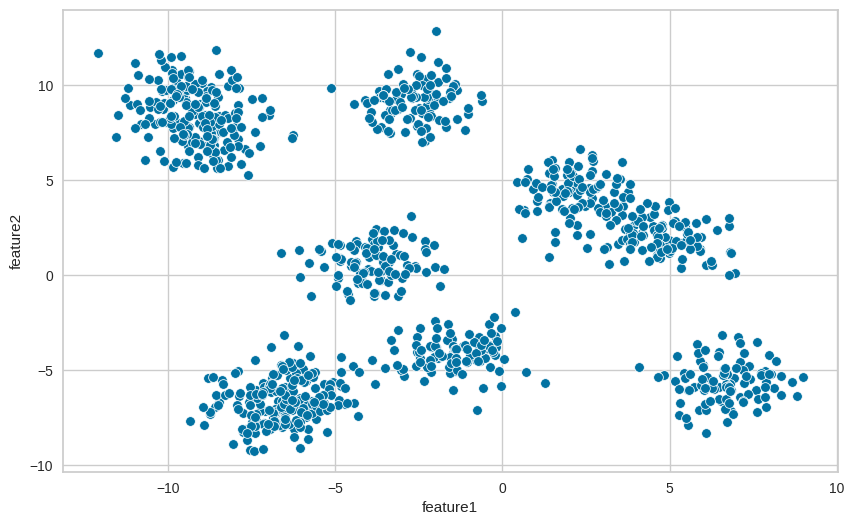

In [ ]:
# Creating a scatter plot using seaborn
# Although, we used 10 centers but the plot below shows overlap between some clusters
# We have only 7-8 separable clusters
fig = plt.figure (figsize=(10,6))
sns.scatterplot(x='feature1', y='feature2', data=data)

####Plotting elbow curve

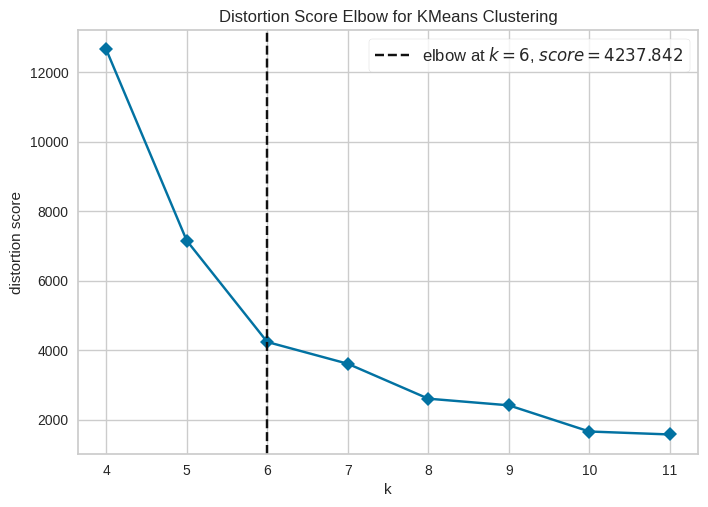

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Using Yellowbrick to generate Elbow curve
# Instantiate the clustering model and visualizer
# this shows after 7-8 clusters, the value of adding clusters is not much
# this verified to what we have seen in scatter plot
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

####Plotting Silhouette curves

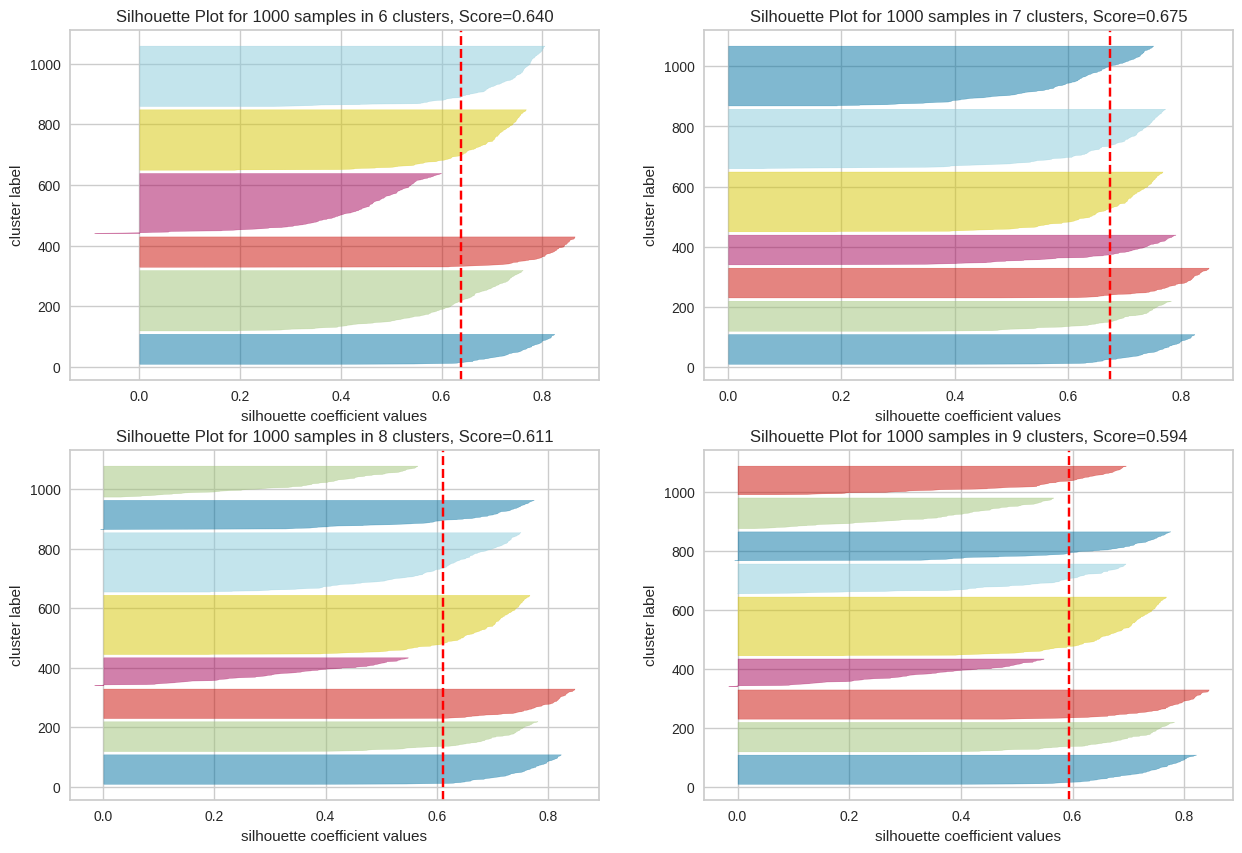

In [ ]:
# We need to create 4 plots for numnber_of_clusters 6,10
fig, axes = plt.subplots(2, 2, figsize=(15,10))
axes_flat = axes.flatten()                     # Flatted the axes to iterate
i=0
for k in range(6,10,1):
    model = KMeans(k, random_state=42)
    # Select the current axis
    ax=axes_flat[i]
    # Creating SilhouetteVisualizer and assigning it to an axis
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=axes_flat[i])
    visualizer.fit(X)
    # Setting subplot title via axis
    ax.set_title(f'Silhouette Plot for 1000 samples in {k} clusters, Score={visualizer.silhouette_score_:.3f}')
    # Setting subplot x and y labels
    ax.set(xlabel='silhouette coefficient values', ylabel='cluster label')
    # Going to the next axis (subplot)
    i=i+1

plt.show()

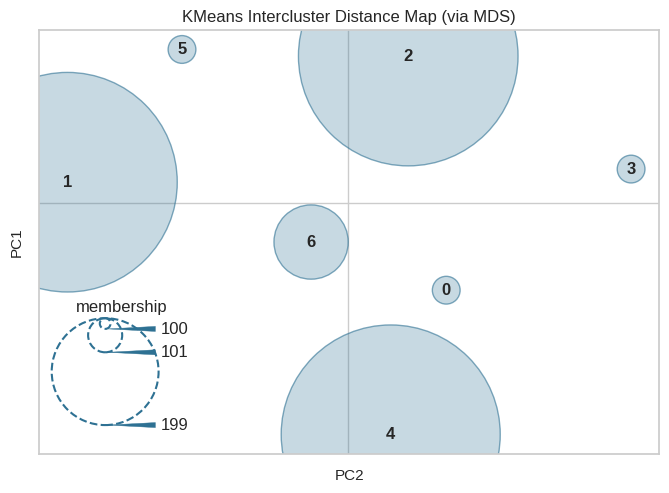

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [ ]:
# Creating intercluster distance map for 7 clusters
# using default embedding MDS
model = KMeans(7)
visualizer = InterclusterDistance(model, random_state=0)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

Key Observations:

 1. **Overall Score**: The plot title indicates an average silhouette score of 0.657 for 7 clusters. This suggests a generally good clustering result, as scores closer to 1 indicate better-defined clusters.

2. **Cluster Widths**: The width of each colored bar represents the distribution of silhouette coefficients for the corresponding cluster. Wider bars imply greater variation in silhouette coefficients within the cluster, suggesting potential heterogeneity.

3. **Cluster Order**: The clusters are likely ordered by their average silhouette coefficients. Clusters with wider bars and lower average coefficients might require further investigation or adjustments to the clustering algorithm or parameters.

4. **Vertical Line**: The vertical red dashed line represents the average silhouette score for all samples. Clusters to the right of this line have a higher average silhouette coefficient than the overall average, indicating better-defined clusters.

Another thing we can try is to use other clustering algorithms like Affinity Propagation which doesn’t require you to supply the value of K and make it a part of the learning process. These algorithms might not work for large datasets. So, in some cases, we need to try them on a subset of data and then use the value in K-Means. The Below code predicted 10 clusters that match the number of centers we have used.

In [ ]:
from sklearn.cluster import AffinityPropagation

# Creating Affinity Propagation model instance
affinity_propagation = AffinityPropagation(random_state=None, damping=0.90)

# Fit the model to your data (replace X with your actual data)
affinity_propagation.fit(X)  # Assuming X is your data

# Now you can access cluster_centers_indices_
num_clusters = len(affinity_propagation.cluster_centers_indices_)
print(f"Number of clusters found: {num_clusters}")

Number of clusters found: 10


<Axes: xlabel='feature1', ylabel='feature2'>

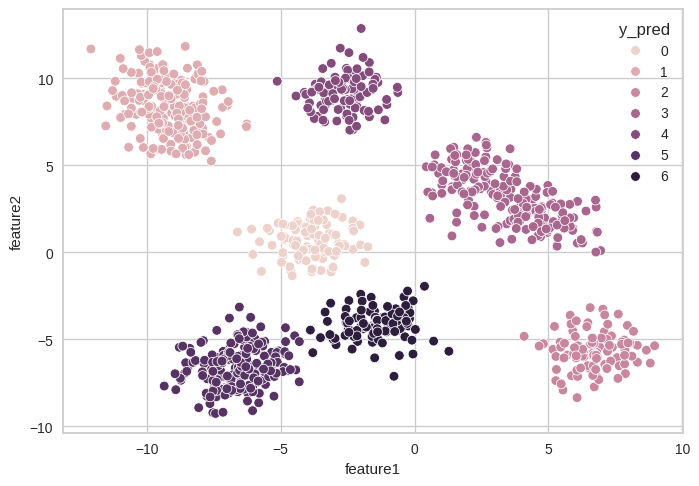

In [ ]:
model = KMeans(n_clusters=7)# fit X
model.fit(X)# predict labels
data['y_pred'] = model.predict(X)# plot results
sns.scatterplot(x='feature1', y='feature2', hue='y_pred', data=data)

##7. Gini Impurity vs Entropy

https://medium.com/@ShreyaG0127/gini-vs-entropy-how-do-they-find-the-optimum-split-e98acf48caa1

Gini Impurity vs. Entropy: Measuring Impurity in Decision Trees

Both Gini Impurity and Entropy are metrics used in decision tree algorithms to determine the best way to split the data at each node. They quantify the impurity or disorder within a dataset.  

Gini Impurity

  Definition: Measures the probability of incorrectly classifying a randomly chosen element from the dataset if it were randomly labeled according to the class distribution in the dataset.   

Formula: Gini Index = 1 - ∑(p_i)^2, where p_i is the probability of an element belonging to class i.
Interpretation:

  A Gini Impurity of 0 indicates a perfectly pure node (all elements belong to the same class).   

A Gini Impurity of 0.5 indicates maximum impurity (classes are equally distributed).  

Entropy

  Definition: Measures the uncertainty or randomness in a dataset.   

Formula: Entropy = -∑(p_i * log2(p_i)), where p_i is the probability of an element belonging to class i.  
Interpretation:

  Entropy of 0 indicates a perfectly pure node.
  Entropy increases as the distribution of classes becomes more uniform.

##8. Bias Variance Tradeoff


The Bias-Variance Tradeoff is at the heart of model selection in supervised learning, influencing the accuracy and applicability of models.

Low Bias are adept at uncovering complex data relationships.However, their sophistication can lead to overfitting, where they perform exceptionally on training data but poorly on new, unseen data
High-bias models, in their simplicity, risk underfitting, failing to capture crucial trends in the data.

Low variance models offer consistent results, regardless of training data variations.
They are predictable but may oversimplify the problem, leading to underfitting.
High variance models are adaptable, capturing nuanced data patterns and random noise.
Their flexibility can be a double-edged sword, making them prone to overfitting and inconsistent performance across different datasets.

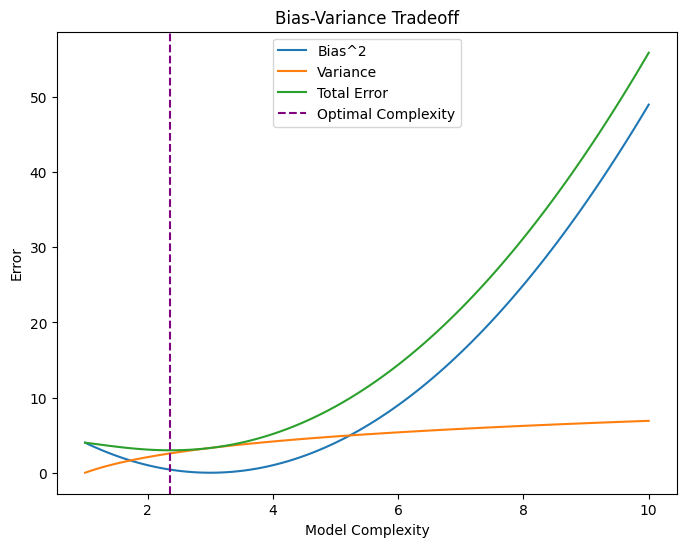

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of model complexity (e.g., polynomial degree)
complexity = np.linspace(1, 10, 100)

# Simulate bias, variance, and error.
# These are simplified examples; actual values would depend on the specific model and data.
bias_squared = (complexity - 3) ** 2
variance = np.log(complexity) * 3

# Calculate total error (bias^2 + variance)
total_error = bias_squared + variance

# Find the optimal complexity (where total error is minimum)
optimal_complexity = complexity[np.argmin(total_error)]

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(complexity, bias_squared, label='Bias^2')
plt.plot(complexity, variance, label='Variance')
plt.plot(complexity, total_error, label='Total Error')
plt.axvline(x=optimal_complexity, color='purple', linestyle='--', label='Optimal Complexity')
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()


##9. Plot Dependency Plot

https://www.kaggle.com/code/dansbecker/permutation-importance  - You can read on Permutation Importance here

We want to predict a person's height when they become 20 years old, using data that is available at age 10.

Our data includes useful features (height at age 10), features with little predictive power (socks owned), as well as some other features we won't focus on in this explanation.

Permutation importance is calculated after a model has been fitted. So we won't change the model or change what predictions we'd get for a given value of height, sock-count, etc.

Instead we will ask the following question: If I randomly shuffle a single column of the validation data, leaving the target and all other columns in place, how would that affect the accuracy of predictions in that now-shuffled data?

Shuffle

Randomly re-ordering a single column should cause less accurate predictions, since the resulting data no longer corresponds to anything observed in the real world. Model accuracy especially suffers if we shuffle a column that the model relied on heavily for predictions. In this case, shuffling height at age 10 would cause terrible predictions. If we shuffled socks owned instead, the resulting predictions wouldn't suffer nearly as much.

With this insight, the process is as follows:

1. Get a trained model.
2. Shuffle the values in a single column, make predictions using the resulting dataset. Use these predictions and the true target values to calculate how much the loss function suffered from shuffling. That performance deterioration measures the importance of the variable you just shuffled.
3. Return the data to the original order (undoing the shuffle from step 2). Now repeat step 2 with the next column in the dataset, until you have calculated the importance of each column.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1026
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 5
[LightGBM] [Info] Start training from score 54.367350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

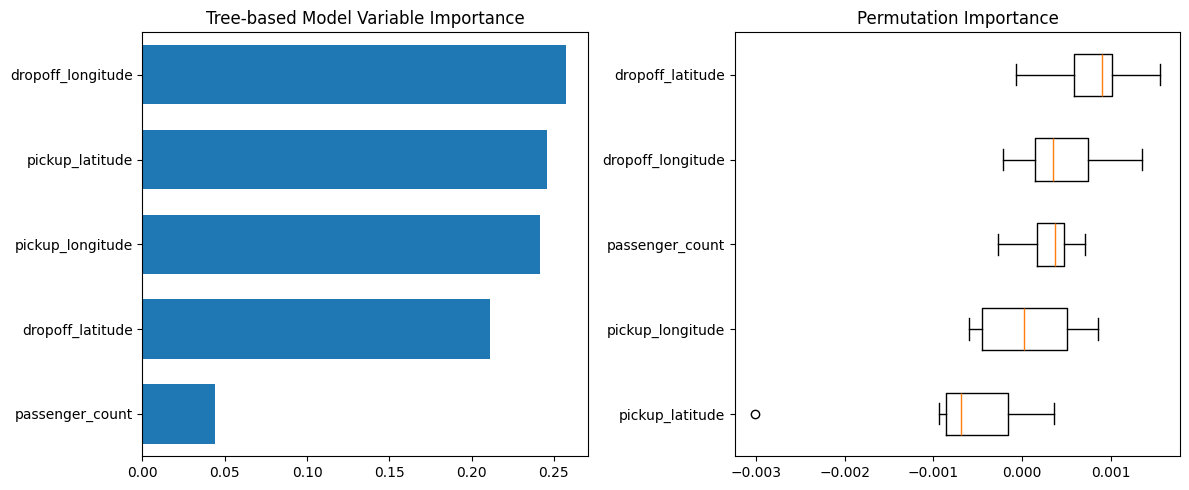

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

import warnings


warnings.filterwarnings("ignore", message="No further splits with positive gain, best gain: -inf")



# Sample data (replace with your actual data)
data = pd.DataFrame({
    'pickup_longitude': np.random.uniform(-74, -73.9, size=50000),
    'pickup_latitude': np.random.uniform(40.7, 40.8, size=50000),
    'dropoff_longitude': np.random.uniform(-74, -73.9, size=50000),
    'dropoff_latitude': np.random.uniform(40.7, 40.8, size=50000),
    'passenger_count': np.random.randint(1, 6, size=50000),
    'fare_amount': np.random.randint(10, 100, size=50000)  # Replace with your fare data
})

# Remove outliers (optional, adjust conditions as needed)
data = data.query('pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' +
                  'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
                  'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
                  'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' +
                  'fare_amount > 0')

y = data['fare_amount']
base_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
X = data[base_features]

X_train0, X_test, y_train0, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Using tuned parameters (adjust hyperparameters as needed)
reg = LGBMRegressor(colsample_bytree=0.8, max_depth=3, min_child_weight=0.1, subsample=0.6,
                    importance_type='gain', random_state=42)
reg.fit(X_train0, y_train0)

print(r2_score(y_train0, reg.predict(X_train0)))  # Print train R-squared
print(r2_score(y_test, reg.predict(X_test)))  # Print test R-squared

# Feature importance using tree-based model
tiout = np.array(reg.feature_importances_) / sum(reg.feature_importances_)
tree_importance_sorted_idx = np.argsort(tiout)
tree_indices = np.arange(0, len(tiout)) + 0.5

# Feature importance using permutation importance
result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

# Visualize two variable importance plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.title.set_text('Tree-based Model Variable Importance')
ax1.barh(tree_indices, tiout[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(X_test.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(tiout)))

ax2.title.set_text('Permutation Importance')
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_test.columns[perm_sorted_idx])

fig.tight_layout()
plt.show()

import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

**Partial Dependence Plots (PDPs)** come into play when you want to understand the relationship between a specific feature and the predictions made by your machine learning model
Variable importance give one importance score per variable and is useful to know which variable affects more or less

Computing partial dependence plots...
done in 11.766s


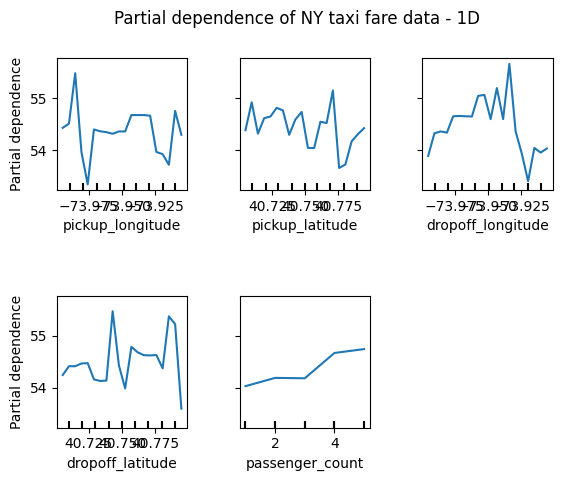

In [15]:
import matplotlib.pyplot as plt
import time
from sklearn.inspection import PartialDependenceDisplay # Import the correct class

print('Computing partial dependence plots...')
tic = time.time()

# Use PartialDependenceDisplay.from_estimator instead of plot_partial_dependence
display = PartialDependenceDisplay.from_estimator(
    reg, X_test, X_test.columns,
    n_jobs=3, grid_resolution=20
)


print("done in {:.3f}s".format(time.time() - tic))

display.figure_.suptitle('Partial dependence of NY taxi fare data - 1D')
display.figure_.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()

Certainly, let's interpret the provided partial dependence plots for the NY taxi fare data.

Overall Observations

    Non-linear Relationships: The plots reveal that the relationship between some features and the predicted fare is not linear. This is evident from the curves in the plots, which deviate from a straight line.

Individual Feature Interpretations:

    pickup_longitude:
        The plot shows a slight upward trend as pickup_longitude increases. This suggests that, in general, pickups at higher longitudes tend to have slightly higher fares. However, there are also some local fluctuations, indicating that the relationship is not entirely linear.

    pickup_latitude:
        The plot shows a more pronounced upward trend as pickup_latitude increases. This implies that pickups at higher latitudes generally have higher fares. Again, there are some local variations.

    dropoff_longitude:
        The plot exhibits a similar pattern to pickup_longitude, with a slight upward trend as dropoff_longitude increases, suggesting that dropoffs at higher longitudes may be associated with higher fares.

    dropoff_latitude:
        The plot shows a more pronounced upward trend as dropoff_latitude increases, indicating that dropoffs at higher latitudes are generally associated with higher fares.

    passenger_count:
        The plot shows a general upward trend as the passenger_count increases, indicating that rides with more passengers tend to have higher fares. This is expected as rides with more passengers typically incur higher costs.